#import libararies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving customer_data.csv to customer_data.csv


In [ ]:
for files in uploaded.keys():
  data=pd.read_csv(files)

#Data exploration

In [ ]:
print(data.head())
print(data.info())
print(data.describe())


   Customer_ID  Birth_Year Education_Level Marital_Status  Annual_Income  \
0            1        1978      Graduation          Widow       40175.23   
1            2        1991             PhD          Widow       27979.68   
2            3        1968             PhD        Married       64747.68   
3            4        1954      Graduation          Widow       50185.85   
4            5        1982      Graduation        Married       53163.09   

   Kids_Home  Teens_Home Customer_Since  Last_Purchase_Recency  Spent_Wine  \
0          1           1     26-09-2010                     68         440   
1          0           1     03-11-2012                     99         826   
2          0           0     31-10-2013                     63         895   
3          2           2     30-04-2010                     65         127   
4          1           2     25-09-2015                     49         140   

   ...  Mobile_App_User  Email_Subscriber  Device_Type  Referred_By_Friend

#data preprocessing

In [ ]:
data.drop(columns=['Customer_ID', 'Customer_Since'], inplace=True)

In [ ]:
data.fillna(data.median(numeric_only=True),inplace=True)

In [ ]:
l1=LabelEncoder()
data['Membership_Tier']=l1.fit_transform(data['Membership_Tier'])
data['Education_Level']=l1.fit_transform(data['Education_Level'])

In [ ]:
data=pd.get_dummies(data,columns=['Device_Type','Marital_Status'],drop_first=True)
data

,Birth_Year,Education_Level,Annual_Income,Kids_Home,Teens_Home,Last_Purchase_Recency,Spent_Wine,Spent_Fruits,Spent_Meat,Spent_Fish,...,Total_Amount_Spent,Customer_Age,Family_Size,Senior_Citizen,Device_Type_Mobile,Device_Type_Tablet,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1978,1,40175.23,1,1,68,440,34,473,215,...,1265,47,2,0,False,False,False,False,False,True
1,1991,3,27979.68,0,1,99,826,24,183,89,...,1647,34,1,0,False,False,False,False,False,True
2,1968,3,64747.68,0,0,63,895,2,315,104,...,1806,57,1,0,False,False,True,False,False,False
3,1954,1,50185.85,2,2,65,127,50,594,104,...,1207,71,4,1,True,False,False,False,False,True
4,1982,1,53163.09,1,2,49,140,49,74,213,...,934,43,4,0,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1960,1,70401.68,2,0,94,851,31,2,293,...,1511,65,2,1,False,True,False,False,False,True
9996,1945,1,66580.08,2,0,0,73,13,492,197,...,957,80,2,1,True,False,False,False,False,False
9997,1940,1,25768.75,0,2,73,209,37,193,188,...,908,85,2,1,True,False,False,False,False,True
9998,1943,1,38167.35,2,2,17,224,4,163,153,...,678,82,5,1,False,False,False,False,True,False


#Feature engineering

In [ ]:
data['Total_kids']=data['Kids_Home']+data['Teens_Home']
data['Income_per_person']=data['Annual_Income']/(data['Family_Size']+1)

EDA

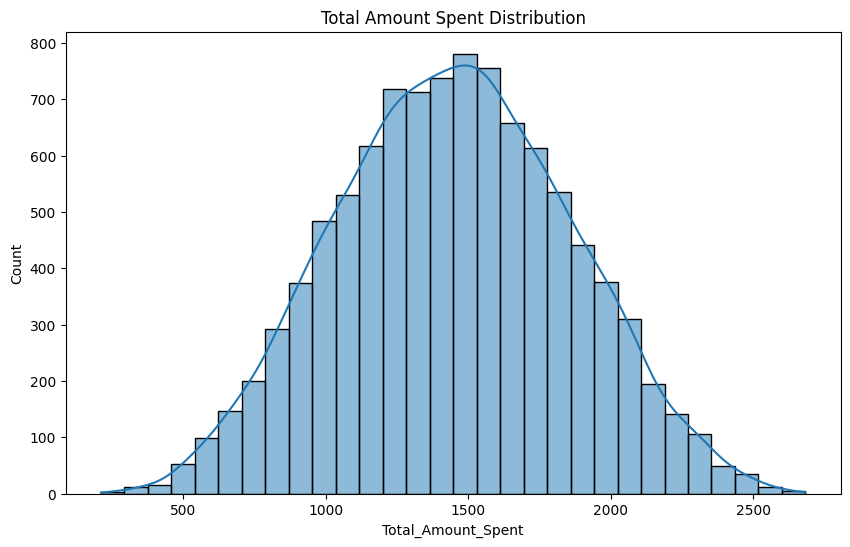

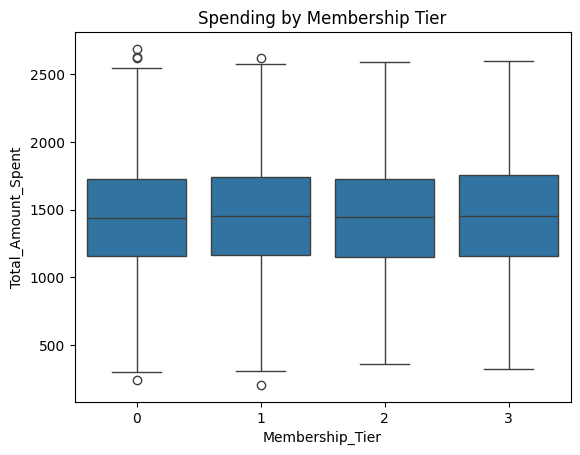

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Total_Amount_Spent'], bins=30, kde=True)
plt.title("Total Amount Spent Distribution")
plt.show()

sns.boxplot(x='Membership_Tier', y='Total_Amount_Spent', data=data)
plt.title("Spending by Membership Tier")
plt.show()

#clustering

      Total_Amount_Spent  Last_Purchase_Recency  Customer_Age  Annual_Income  \
0                   1265                     68            47       40175.23   
1                   1647                     99            34       27979.68   
2                   1806                     63            57       64747.68   
3                   1207                     65            71       50185.85   
4                    934                     49            43       53163.09   
...                  ...                    ...           ...            ...   
9995                1511                     94            65       70401.68   
9996                 957                      0            80       66580.08   
9997                 908                     73            85       25768.75   
9998                 678                     17            82       38167.35   
9999                1511                     99            75       69494.61   

      Total_kids  
0              2  
1

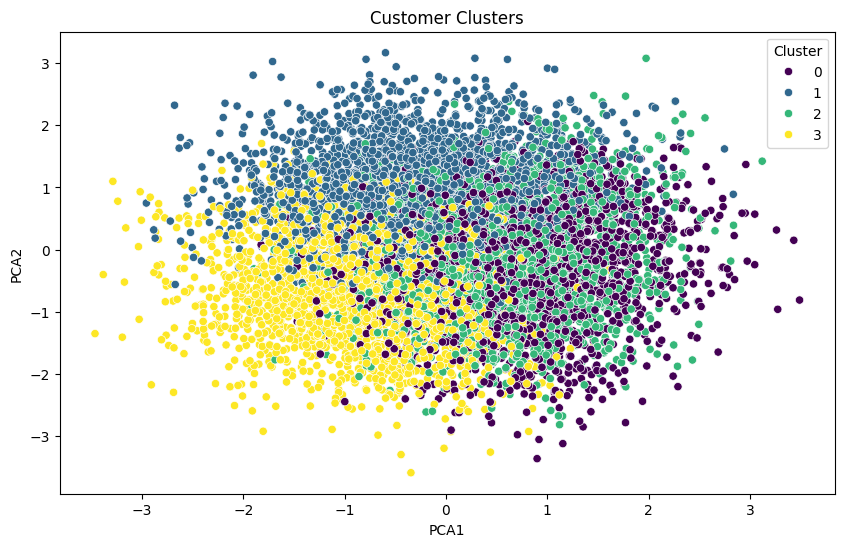

In [ ]:
features=['Total_Amount_Spent','Last_Purchase_Recency','Customer_Age','Annual_Income','Total_kids']
X=data[features]
print(X)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans=KMeans(n_clusters=4,random_state=42)
data['Cluster']=kmeans.fit_predict(X_scaled)
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
data['PCA1']=X_pca[:,0]
data['PCA2']=X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1',y='PCA2',hue='Cluster',data=data,palette='viridis')
plt.title("Customer Clusters")
plt.show()

#classification:High value customer

0       False
1        True
2        True
3       False
4       False
        ...  
9995     True
9996    False
9997    False
9998    False
9999     True
Name: High_Spender, Length: 10000, dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Birth_Year               10000 non-null  int64  
 1   Education_Level          10000 non-null  int64  
 2   Annual_Income            10000 non-null  float64
 3   Kids_Home                10000 non-null  int64  
 4   Teens_Home               10000 non-null  int64  
 5   Last_Purchase_Recency    10000 non-null  int64  
 6   Spent_Wine               10000 non-null  int64  
 7   Spent_Fruits             10000 non-null  int64  
 8   Spent_Meat               10000 non-null  int64  
 9   Spent_Fish               10000 non-null  int64  
 10  Spent_Sweets             10000 non-nul

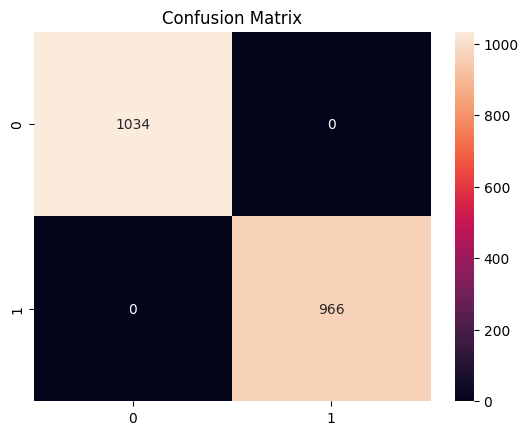

In [ ]:
data['High_Spender']=data['Total_Amount_Spent']>data['Total_Amount_Spent'].median()
y=data['High_Spender']
print(y)
X_cls=data.drop(columns=['High_Spender','Cluster','PCA1','PCA2','Country','City'])
print(X_cls.info())
X_train, X_test, y_train, y_test = train_test_split(X_cls, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
summary=data.groupby('Cluster')[features+['High_Spender']].mean()
summary

,Total_Amount_Spent,Last_Purchase_Recency,Customer_Age,Annual_Income,Total_kids,High_Spender
Cluster,,,,,,
0,1469.439181,66.821596,65.419548,48484.760282,3.064447,0.522834
1,1422.726217,74.774906,43.558052,49821.853820,1.296255,0.474532
2,1384.639225,31.032284,70.102502,48397.281199,1.332123,0.444713
3,1516.568354,25.035871,39.347947,52924.617963,2.361100,0.559585


In [ ]:
data.to_csv("customer_segmented_output_improved.csv", index=False)